INDIVIDUAL TEAM : 
           REGN:  21BAI1431
           NAME:  YASWANTH.A

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [47]:
data = pd.read_csv("spam.csv.xls", encoding='latin-1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [48]:
data=data.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)
data.head(5)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [49]:
data.rename(columns={'v1':'Label','v2':'Message'},inplace=True)
data.head(5)

,Label,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [50]:
data.isnull().sum()

Label      0
Message    0
dtype: int64

In [51]:
data.duplicated().sum()

403

In [52]:
data=data.drop_duplicates()
data.duplicated().sum()

0

In [53]:
from sklearn.preprocessing import LabelEncoder
Encoder=LabelEncoder()
data['Label']=Encoder.fit_transform(data['Label'])
data

,Label,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


([<matplotlib.patches.Wedge at 0x7f4e1c209840>,
 [Text(-1.0144997251399075, 0.42519443516002464, 'Not Spam'),
  Text(1.014499764949479, -0.4251943401757036, 'Spam')])

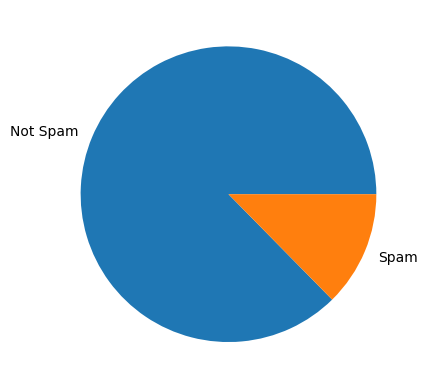

In [54]:
plt.pie(data['Label'].value_counts(),labels=['Not Spam','Spam'])

In [55]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [56]:
from nltk.tokenize import word_tokenize
data['num_words']=data['Message'].apply(lambda x:len(nltk.word_tokenize(x)))
data.head(5)
data['sent']=data['Message'].apply(lambda x:len(nltk.sent_tokenize(x)))
data['num_character']=data['Message'].apply(len)
data.head(5)

,Label,Message,num_words,sent,num_character
0,0,"Go until jurong point, crazy.. Available only ...",24,2,111
1,0,Ok lar... Joking wif u oni...,8,2,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,37,2,155
3,0,U dun say so early hor... U c already then say...,13,1,49
4,0,"Nah I don't think he goes to usf, he lives aro...",15,1,61


In [58]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')
len(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


179

In [59]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [60]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [61]:
def Text_transform(message):
      message=message.lower()
      message=nltk.word_tokenize(message)
      y=[]
      
      for i in message:
          if i not in stopwords.words('english') and i not in string.punctuation:
              y.append(i)
      message=y[:]
      y.clear()
      for i in message:
          y.append(ps.stem(i))
      
      return " ".join(y)

In [62]:
data['Transformed_Message']=data['Message'].apply(Text_transform)

In [63]:
data['Transformed_Message'].shape

(5169,)

In [25]:
#1 spam

In [65]:
spam_corpus=[]
for msg in data[data['Label']==1]['Transformed_Message'].tolist():
    for word in msg.split():
      spam_corpus.append(word)
from collections import Counter
Counter(spam_corpus)
Counter(spam_corpus).most_common(20)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ("'s", 59),
 ('urgent', 57)]

In [81]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfid=TfidfVectorizer(max_features=3000)
x=tfid.fit_transform(data['Transformed_Message']).toarray()
x.shape

(5169, 3000)

In [82]:
y=data['Label'].values

In [83]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [84]:
from sklearn.naive_bayes import MultinomialNB
mn=MultinomialNB()
mn.fit(x_train,y_train)

MultinomialNB()

In [85]:
y_pred=mn.predict(x_test)

In [86]:
dit=pd.DataFrame({'Actual':y_test,'Predict':y_pred})
dit

,Actual,Predict
0,0,0
1,0,0
2,0,0
3,0,0
4,1,1
...,...,...
1029,0,0
1030,0,0
1031,0,0
1032,0,0


INDIVIDUAL TEAM : REGN: 21BAI1431 NAME: YASWANTH.A

In [87]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9748549323017408

In [73]:
user_msg=input("Enter Message: ")

converted_msg=Text_transform(user_msg)
new_msg=tfid.transform([converted_msg])

yp=mn.predict(new_msg)
if(yp==0):
  print("Not Spam")
else:
  print("Spam")

Enter Message: Please call our customer service representative on 0800 169 6031 between 10am-9pm as you have WON a guaranteed å£1000 cash or å£5000 prize!
Spam
